<table>
<tr>
  <td><img src="figures/iris_setosa.jpg"></td>
  <td><img src="figures/iris_versicolor.jpg"></td>
  <td><img src="figures/iris_virginica.jpg"></td>
</tr>

<tr>
  <td>Iris Setosa</td><td>Iris Versicolor</td><td>Iris Virginica</td>
</tr>

From <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Wikipedia</a>:

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 25%; float: left; padding: 1em;"/>

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

<br/>
"Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg

In [170]:
%matplotlib inline

import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise

In this exercise, we train a classifier to tell us the type of a flower, based on several of its measured properties.

### Load the data

1. Using the ``read_csv`` command in Pandas, load the dataset in the file ``data/iris.csv``.
2. Use the ``head`` method of the resulting DataFrame to see the first few entries.
3. Use the ``tail`` method to see the last few entries.

In [119]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Examine the data

Let's use ``groupby`` to group measurements by flower name and then display summary statistics.  Look at the numbers, and see if you can identify any big differences between species:

In [121]:
iris.groupby('Name').describe()

PetalLength  PetalWidth  SepalLength  SepalWidth
Name                                                                   
Iris-setosa     count    50.000000   50.000000    50.000000   50.000000
                mean      1.464000    0.244000     5.006000    3.418000
                std       0.173511    0.107210     0.352490    0.381024
                min       1.000000    0.100000     4.300000    2.300000
                25%       1.400000    0.200000     4.800000    3.125000
                50%       1.500000    0.200000     5.000000    3.400000
                75%       1.575000    0.300000     5.200000    3.675000
                max       1.900000    0.600000     5.800000    4.400000
Iris-versicolor count    50.000000   50.000000    50.000000   50.000000
                mean      4.260000    1.326000     5.936000    2.770000
                std       0.469911    0.197753     0.516171    0.313798
                min       3.000000    1.000000     4.900000    2.000000
                25%       4.000000    1.200000     5.600000    2.525000
                50%       4.350000    1.300000     5.900000    2.800000
                75%       4.600000    1.500000     6.300000    3.000000
                max       5.100000    1.800000     7.000000    3.400000
Iris-virginica  count    50.000000   50.000000    50.000000   50.000000
                mean      5.552000    2.026000     6.588000    2.974000
                std       0.551895    0.274650     0.635880    0.322497
                min       4.500000    1.400000     4.900000    2.200000
                25%       5.100000    1.800000     6.225000    2.800000
                50%       5.550000    2.000000     6.500000    3.000000
                75%       5.875000    2.300000     6.900000    3.175000
                max       6.900000    2.500000     7.900000    3.800000

### Visualize the data

- Use Seaborn's ``pairplot`` function to display the different features of the data.
- Remember to set the keyword `hue` to the correct column name so that the classes are colored separately.

/home/stefan/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:620: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


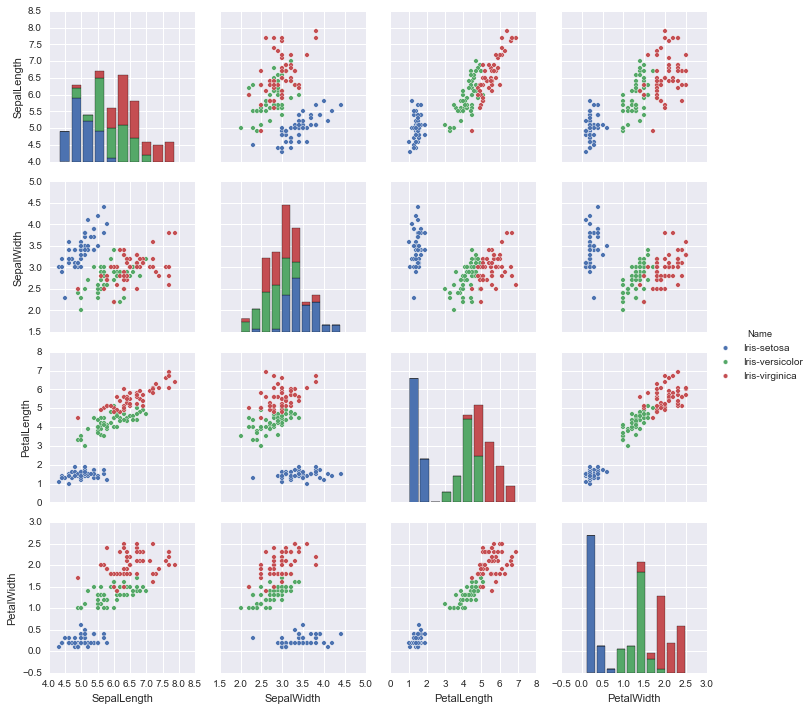

In [122]:
sns.pairplot(iris, hue='Name');

You can see that this dataset should be very easy to classify.

Now, use the ``pop`` method of the DataFrame to grab the labels from the Name column:

In [145]:
data = iris.copy()
labels = data.pop('Name')

In [146]:
labels[:15]

0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
Name: Name, dtype: object

### Transform labels to numbers

Let's transform those text labels to numbers (0, 1, or 2) respectively.  Strictly speaking, this isn't necessary, since NumPy arrays can contain objects, and comparisons work fine on those.  But in general, working with numbers speed things up a lot.

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split data into training & testing data

Using ``sklearn.cross_validation.train_test_split``, split the dataset and labels into two: training data and testing data.

**Since this is such an easy problem, we only want 0.1% of the samples to go towards training.**

Note, it's important to pass both data and labels into the ``train_test_split`` function together so that they can be split the same way (i.e., do not run ``train_test_split`` once for each).

**Hint:** *If you set the ``random_state`` variable, you will always get the same split, and your experiments will be comparable.*

In [163]:
from sklearn.cross_validation import train_test_split

In [164]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, train_size=0.1, random_state=42)

Check the lengths of the training and testing data and labels.

In [153]:
len(data_train), len(data_test)

(15, 135)

### Classify and evaluate

In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### The Gaussian Naive Bayes classifier is a good entry-level benchmark

In [155]:
nb = GaussianNB()
nb.fit(data_train, labels_train)
labels_predicted_nb = nb.predict(data_test)
accuracy_score(labels_test, labels_predicted_nb)

0.80000000000000004

### Now, try the evaluation, but with a RandomForest classifier

In [166]:
rf = RandomForestClassifier(random_state=42)
rf.fit(data_train, labels_train)
labels_predicted_rf = rf.predict(data_test)
accuracy_score(labels_test, labels_predicted_rf)

0.9555555555555556

And let's look at the feature importances, just for the fun of it:

In [161]:
list(zip(iris.columns, rf.feature_importances_))

[('SepalLength', 0.020833333333333332),
 ('SepalWidth', 0.18605313657156974),
 ('PetalLength', 0.29230864501601828),
 ('PetalWidth', 0.50080488507907861)]

# Extra/advanced exercise

In this example, we're going to work with a digits dataset.  Each digit is represented as a matrix, with values representing intensity (0 is black, 16 is white).  To form a feature vector, the matrix is "unravelled", i.e. all the values are unpacked from the matrix into a single, long vector.

In [191]:
from sklearn.datasets import load_digits
digits = load_digits()

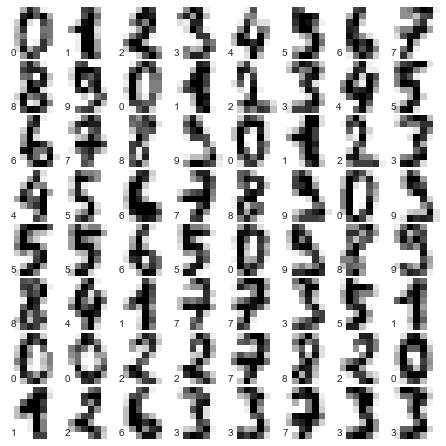

In [192]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Visualization

A good first-step for many problems is to visualize the data using one of the
*Dimensionality Reduction* techniques we saw earlier.  We'll start with the
most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest
variance, and as such, can help give you a good idea of the structure of the
data set.  Here we'll use `RandomizedPCA`, because it's faster for large `N`.

In [181]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(digits.data)

/home/stefan/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:620: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


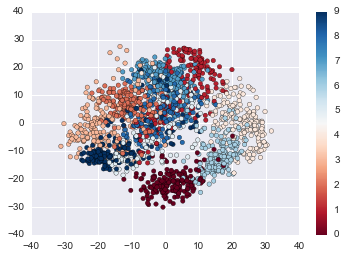

In [182]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='RdBu')
plt.colorbar();

Here we see that the digits do cluster fairly well, so we can expect even
a fairly naive classification scheme to do a decent job separating them.

A weakness of PCA is that it produces a linear dimensionality reduction:
this may miss some interesting relationships in the data.  If we want to
see a nonlinear mapping  of the data, we can use one of the several
methods in the `manifold` module.  Here we'll use Isomap (ISOmetric MAPping)
which is a manifold learning method based on graph theory:

In [193]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

/home/stefan/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:620: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


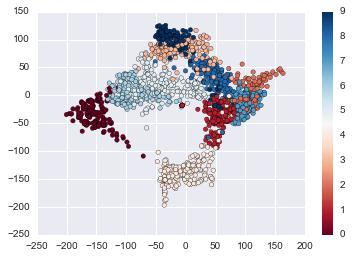

In [194]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='RdBu')
plt.colorbar();

These visualizations show that it classification should be possible!

### Now, train classifiers as we did with the Iris dataset, and see how they do!